In [1]:
#importing the librarys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#reading the data
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST.csv")

In [3]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [4]:
train["destination"].unique()

array(['Theatre District', 'Fenway', 'Beacon Hill', 'North End',
       'Northeastern University', 'Financial District',
       'Boston University', 'Haymarket Square', 'West End',
       'South Station', 'North Station', 'Back Bay'], dtype=object)

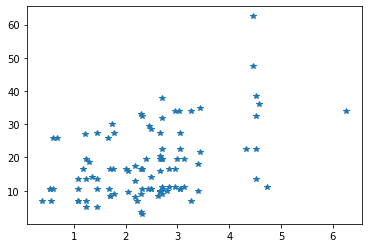

In [7]:
n=100
plt.plot(train["distance"][:n] , train["fare"][:n],"*")
plt.show()

In [8]:
# trying to add days as a feature 
train_time_stamp = train["time_stamp"]%30
test_time_stamp = test["time_stamp"]%30 

In [10]:
#cols to drops
drop_cols=["index" , "time_stamp" ]

In [11]:
train=train.drop(labels=drop_cols , axis=1)
train.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [12]:
test=test.drop(labels=drop_cols , axis=1)
test.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,Uber,Financial District,Fenway,6.83,1.0,UberX
3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [13]:
test["time_stamp"] = test_time_stamp
train["time_stamp"] = train_time_stamp

In [14]:
#encoding the categorical data
dum_cols=["cab_provider", "cab_type", "source" , "destination"]
train_dum_data=pd.get_dummies(train[dum_cols])
test_dum_data=pd.get_dummies(test[dum_cols])

In [15]:
train = pd.concat([train , train_dum_data], axis=1)
test = pd.concat([test , test_dum_data], axis=1)

In [16]:
train.shape  , test.shape

((100000, 46), (25000, 45))

In [17]:
train.drop(labels=dum_cols , axis=1 ,inplace= True)
test.drop(labels=dum_cols , axis=1 ,inplace= True)

In [18]:
train.tail()

,distance,surge_multiplier,fare,time_stamp,cab_provider_Lyft,cab_provider_Uber,cab_type_Black,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
99995,1.16,1.0,12.0,19,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,1.16,1.0,26.0,19,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,1.16,1.0,16.0,19,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,1.16,1.0,7.0,19,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99999,1.23,1.0,7.0,19,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X = train.drop(labels=["fare"] , axis = 1)
y = train["fare"] 

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [22]:
def create_csv(fn , data):
    template = pd.DataFrame(columns=["index", "fare"])
    template["index"] = test.index
    template["fare"] = data
    
    template.to_csv(fn,index=False)

### Model

### Lin_reg

In [25]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.score(X_test , y_test)
#0.9280675951815676 
#0.9293441475161828

0.9293572041011677

In [27]:
y_pred = model.predict(test)

In [28]:
create_csv("lin_reg_4.csv", y_pred)

### Ploy _ reg

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(2)
ploy_x = poly.fit_transform(X_train)

In [31]:
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(ploy_x , y_train)
#model.score(poly.fit_transform(X_test) , y_test)  
#0.9648825741011441

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
model.score(poly.fit_transform(X_test) , y_test)

0.9651298363854292

In [33]:
y_pred=model.predict(poly.fit_transform(test))

In [34]:
create_csv("ploy_reg2.csv", y_pred)

### Random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
trees=range(50,70,5)
train_erros=[]
test_erros=[]
for i in trees:
    model = RandomForestRegressor(criterion ="mse",n_estimators=i)
    model.fit(X_train , y_train)
    train_erros.append(model.score(X_train , y_train))
    test_erros.append(model.score(X_test , y_test))
    print("Completes :" , i)

Completes : 50
Completes : 55
Completes : 60
Completes : 65


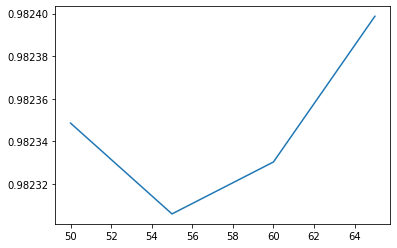

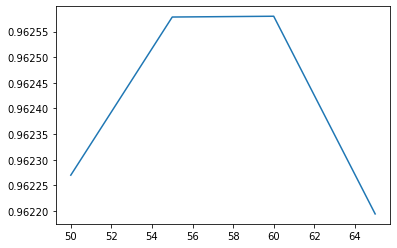

In [74]:
plt.plot(trees , train_erros)
plt.show()
plt.plot(trees , test_erros)
plt.show()

In [36]:
model = RandomForestRegressor(criterion ="mse",n_estimators=10)
model.fit(X_train , y_train)
#model.score(X_train , y_train), model.score(X_test , y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [37]:
model.score(X_train , y_train), model.score(X_test , y_test)

(0.9870552597718356, 0.9590658206843534)

In [ ]:
#y_pred = model.predict(test)
y_pred=model.predict(poly.fit_transform(test))

In [ ]:
create_csv("rand_forest7.csv", y_pred)

### NN

In [38]:
import tensorflow as tf
from tensorflow import keras

In [46]:
xt=np.array(X_train)
yt=np.array(y_train)
xtest=np.array(X_test)
ytest=np.array(y_test)

In [59]:
model1=keras.Sequential([keras.layers.Flatten(),
                  keras.layers.Dense(300,activation=tf.nn.relu),
                  keras.layers.Dense(150,activation=tf.nn.relu),
                  keras.layers.Dense(75,activation=tf.nn.relu),
                  keras.layers.Dense(35,activation=tf.nn.relu),
                  keras.layers.Dense(15,activation=tf.nn.relu),
                  keras.layers.Dense(7,activation=tf.nn.relu),
                  keras.layers.Dense(3,activation=tf.nn.relu),
                  keras.layers.Dense(2,activation=tf.nn.relu),
                  keras.layers.Dense(1,activation=tf.nn.relu),
                 ])

model1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.mae)

his=model1.fit(xt,yt,epochs=20,validation_data=(xtest,ytest),initial_epoch=11)

Train on 70000 samples, validate on 30000 samples
Epoch 12/20
70000/70000 [==============================] - 8s 108us/sample - loss: 1.8606 - val_loss: 1.3030
Epoch 13/20
70000/70000 [==============================] - 7s 102us/sample - loss: 1.3271 - val_loss: 1.3537
Epoch 14/20
70000/70000 [==============================] - 10s 141us/sample - loss: 1.2524 - val_loss: 1.2303
Epoch 15/20
70000/70000 [==============================] - 10s 147us/sample - loss: 1.2182 - val_loss: 1.1294
Epoch 16/20
70000/70000 [==============================] - 10s 144us/sample - loss: 1.1993 - val_loss: 1.1431
Epoch 17/20
70000/70000 [==============================] - 11s 151us/sample - loss: 1.1754 - val_loss: 1.1345
Epoch 18/20
70000/70000 [==============================] - 11s 156us/sample - loss: 1.1578 - val_loss: 1.2342
Epoch 19/20
70000/70000 [==============================] - 11s 162us/sample - loss: 1.1668 - val_loss: 1.1549
Epoch 20/20
70000/70000 [==============================] - 11s 161us/sam

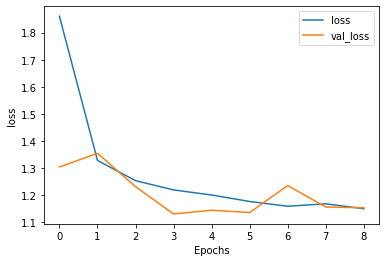

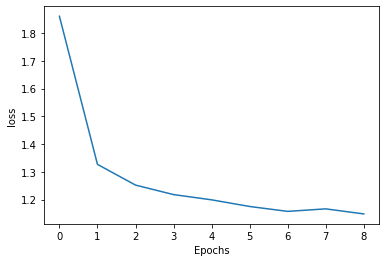

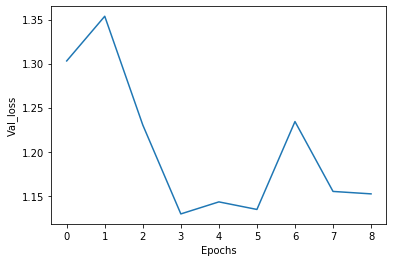

In [60]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
#plot_graphs(his, "accuracy")
plot_graphs(his, "loss")
string="loss"
plt.plot(his.history[string])
plt.xlabel("Epochs")
plt.ylabel(string)
plt.show()

plt.plot(his.history['val_'+string])
plt.xlabel("Epochs")
plt.ylabel("Val_"+string)
plt.show()

In [94]:
#y_check=model1.predict(test)
y_check=model1.predict(test)

In [95]:
create_csv("nn9.csv", y_check)